# Funções, bibliotecas e Dataframe ficticios

In [50]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.font_manager as fm #para alterar as fontes dos graficos
import seaborn as sns

import pyperclip

# Definindo o estilo de fonte e tema
fonte = fm.FontProperties(family="Calibri", style="italic")

sns.set_style('whitegrid') #cor da grade(fundo)

In [2]:
import pandas as pd
import numpy as np

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)
#df = fake_database2(2250); df_bck = df.copy(); display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)

# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

print('TUDO OK')

# Criando dataframe sintetico desbalanceado

In [113]:
from sklearn.datasets import make_classification
import pandas as pd

# Gerar dados sintéticos desbalanceados
x, y = make_classification(n_samples=10000, 
                           n_features=10, 
                           #n_informative=4,   # Aumentar o número de features informativas
                           n_redundant=4,
                           #n_classes=2, 
                           #n_clusters_per_class=5,  # Manter 5 clusters por classe
                           weights=[0.93, 0.07], 
                           class_sep=0.8,
                           random_state=3141592)

# Criar um DataFrame
df = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(x.shape[1])])
df['target'] = y

# Ver a distribuição de classes
print(df['target'].value_counts(normalize=True))
print(df['target'].value_counts())

display(pd.concat([df.head(5), df.tail(5)]).T)
# Salvar para análise
#df.to_csv('imbalanced_dataset.csv', index=False)


target
0   0.93
1   0.07
Name: proportion, dtype: float64
target
0    9253
1     747
Name: count, dtype: int64


,0,1,2,3,4,9995,9996,9997,9998,9999
feature_0,-0.28,-0.41,-2.02,-0.69,-1.32,-0.93,-1.08,-0.61,-1.60,-1.55
feature_1,-1.09,-1.03,0.40,0.71,-0.79,-0.92,-0.68,-0.74,-0.04,-0.85
feature_2,-1.72,0.16,-1.01,0.54,-0.78,-1.00,1.10,1.19,1.38,-1.63
feature_3,-0.69,-0.80,-1.89,-0.43,-1.63,-1.29,-1.35,-0.90,-1.63,-1.89
feature_4,-1.35,-1.42,-1.57,0.03,-2.07,-1.82,-1.74,-1.33,-1.60,-2.37
feature_5,-0.12,-0.77,-0.04,-0.78,-0.19,0.27,0.95,-0.05,0.86,-1.47
feature_6,-1.33,-1.33,-0.50,0.46,-1.49,-1.45,-1.26,-1.10,-0.79,-1.67
feature_7,0.51,-0.44,0.41,1.40,-0.83,-1.04,1.09,0.29,0.36,1.16
feature_8,-0.56,-0.56,-0.29,0.16,-0.66,-0.63,-0.56,-0.48,-0.39,-0.75
feature_9,0.20,-1.07,-0.93,-0.06,1.07,0.54,0.11,-1.57,-0.06,0.30


In [ ]:
# Variavel Dependente
var_dep = 'target'
y = df[var_dep]
display(y.head())

x = df.drop(var_dep, axis=1)

In [ ]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# Normalização (scaling entre 0 e 1) com MinMaxScaler ******************************
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)
# df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

# Padronização (média 0 e desvio padrão 1) com StandardScaler **********************
#from sklearn.preprocessing import StandardScaler
#padronizacao = StandardScaler()
#x = padronizacao.fit_transform(x)
# df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
#backups
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

# Testando diversos modelos

In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

np.random.seed(3141592) #para garantir a reprodutibilidade

from sklearn.metrics import precision_score, recall_score
def custom_metric(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return precision.round(2), recall.round(2)

clf = LazyClassifier(verbose=0, 
                     ignore_warnings=True, 
                     custom_metric=custom_metric)
#predictions=True

models, predictions = clf.fit(x_treino, x_teste, y_treino, y_teste)
################################################################################

precisions = []
recalls = []

for metric in predictions['custom_metric']:
    precision, recall = metric
    precisions.append(precision)
    recalls.append(recall)

predictions['Precision'] = precisions
predictions['Recall'] = recalls
predictions.drop(columns=['custom_metric'], inplace=True)
predictions = predictions.sort_values(by='Recall', ascending=False)

# Normalização Min-Max
predictions['Precision_normalized'] = (predictions['Precision'] - predictions['Precision'].min()) / (predictions['Precision'].max() - predictions['Precision'].min())
predictions['Recall_normalized'] = (predictions['Recall'] - predictions['Recall'].min()) / (predictions['Recall'].max() - predictions['Recall'].min())

# Criação do índice composto para ranquear o melhor modelo
predictions['indice_composto'] = predictions['Precision_normalized'] * 0.4 + predictions['Recall_normalized'] * 0.6 # pesos de 40% para precisão e 60% para recall
predictions['indice_composto_normalized'] = (predictions['indice_composto'] - predictions['indice_composto'].min()) / (predictions['indice_composto'].max() - predictions['indice_composto'].min())
predictions['indice_composto_normalized'] = predictions['indice_composto_normalized'].round(2)
predictions = predictions.sort_values(by='indice_composto_normalized', ascending=True)

display(predictions)

In [ ]:
import plotly.graph_objects as go

# Dados de exemplo: Precisão e Recall para os modelos
model_names = predictions.index.tolist()
precisions = predictions['Precision'].tolist()
recalls = predictions['Recall'].tolist()
indice_composto = predictions['indice_composto_normalized'].tolist()

# Criando o gráfico de barras invertidas
fig = go.Figure()

# Adicionando barras para precisão
fig.add_trace(go.Bar(
    y=model_names,
    x=indice_composto,
    name='Indice Composto',
    orientation='h',
    text=indice_composto,
    textposition='outside'
))

# Adicionando barras para precisão
fig.add_trace(go.Bar(
    y=model_names,
    x=precisions,
    name='Precisão',
    orientation='h',
    text=precisions,
    textposition='outside'
))

# Adicionando barras para recall
fig.add_trace(go.Bar(
    y=model_names,
    x=recalls,
    name='Recall',
    orientation='h',
    text=recalls,
    textposition='outside'
))

# Configurando o layout do gráfico
fig.update_layout(
    title='Precisão e Recall dos Modelos',
    xaxis=dict(title='Valor da Métrica'),
    yaxis=dict(title='Modelos', automargin=True),
    barmode='group',
    template='plotly_white',
    height=1500
)

# Mostrar o gráfico
fig.show()


In [9]:
#list(models.index)

In [ ]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV

# Importar modelos de bibliotecas externas (XGBoost e LightGBM)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Dicionário com todos os modelos
model_dict = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'NearestCentroid': NearestCentroid(),
    'LGBMClassifier': LGBMClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier': XGBClassifier(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'Perceptron': Perceptron(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'LabelSpreading': LabelSpreading(),
    'LabelPropagation': LabelPropagation(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'CalibratedClassifierCV': CalibratedClassifierCV(),
    'LinearSVC': LinearSVC(),
    'DummyClassifier': DummyClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'SGDClassifier': SGDClassifier(),
    'BernoulliNB': BernoulliNB()
}

# Teste imprimindo os nomes dos modelos no dicionário
for model_name in model_dict:
    print(f"Modelo: {model_name}, Instância: {model_dict[model_name]}")

# XGBoost Basico

In [114]:
import xgboost as xgb
#modelo_xgb_basico = xgb.XGBClassifier()
from sklearn.linear_model import LogisticRegression
modelo_xgb_basico = LogisticRegression()

# Treinamento do Modelo
modelo_xgb_basico.fit(x_treino, y_treino)

LogisticRegression()

In [119]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = modelo_xgb_basico.predict(x_teste)

fd_xgb_basico = aval_modelo_corte_tabela(x_teste, y_teste, modelo_xgb_basico, beta=1.5)
display(fd_xgb_basico)
#aval_modelo_corte_grafico(fd_xgb_basico)

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,0.00,0,2313,0,187,0.07,0.07,1.00,0.00,0.14,0.07,0.00,1.00,0.00,0.93,0.00,0.00,0.00,0.21
1,0.10,1969,344,48,139,0.84,0.29,0.74,0.85,0.41,0.29,0.98,0.15,0.26,0.71,0.02,0.59,0.40,0.50
2,0.20,2175,138,81,106,0.91,0.43,0.57,0.94,0.49,0.43,0.96,0.06,0.43,0.57,0.04,0.51,0.45,0.52
3,0.30,2232,81,98,89,0.93,0.52,0.48,0.96,0.50,0.52,0.96,0.04,0.52,0.48,0.04,0.44,0.46,0.49
4,0.40,2275,38,126,61,0.93,0.62,0.33,0.98,0.43,0.62,0.95,0.02,0.67,0.38,0.05,0.31,0.42,0.38
5,0.50,2292,21,147,40,0.93,0.66,0.21,0.99,0.32,0.66,0.94,0.01,0.79,0.34,0.06,0.20,0.35,0.27
6,0.60,2301,12,159,28,0.93,0.70,0.15,0.99,0.25,0.70,0.94,0.01,0.85,0.30,0.07,0.14,0.30,0.20
7,0.70,2307,6,172,15,0.93,0.71,0.08,1.00,0.14,0.71,0.93,0.00,0.92,0.29,0.07,0.08,0.22,0.11
8,0.80,2309,4,179,8,0.93,0.67,0.04,1.00,0.08,0.67,0.93,0.00,0.96,0.33,0.07,0.04,0.16,0.06
9,0.90,2311,2,186,1,0.93,0.33,0.01,1.00,0.01,0.33,0.93,0.00,0.99,0.67,0.07,0.00,0.03,0.01


,feature_4,predict_proba
0,0.00,0.00
1,0.11,0.00
2,0.22,0.01
3,0.33,0.01
4,0.44,0.03
5,0.56,0.05
6,0.67,0.09
7,0.78,0.16
8,0.89,0.27
9,1.00,0.42


In [127]:
import numpy as np
import pandas as pd

def contribuicao_proba_tabela(df, coluna_analisada, model, sep=10):
    # Criar DataFrame para análise com a variável de interesse variando em um intervalo
    minimo, maximo = df[coluna_analisada].min(), df[coluna_analisada].max()
    df_analise_feature = pd.DataFrame({coluna_analisada: np.linspace(minimo, maximo, sep)})

    # Preencher as demais colunas com o valor médio
    for coluna in df.columns:
        if coluna != coluna_analisada:
            df_analise_feature[coluna] = df[coluna].mean()

    # Fazer previsão de probabilidade e adicionar ao DataFrame de análise
    df_analise_feature['predict_proba'] = model.predict_proba(df_analise_feature)[:, 1]

    # Retornar apenas a coluna analisada e a probabilidade prevista
    return df_analise_feature[[coluna_analisada, 'predict_proba']]

#x_data = pd.DataFrame(x_teste, columns=df.columns[:-1])
#resultado = contribuicao_proba_tabela(x_data, 'feature_4', modelo_xgb_basico, sep=10)
#resultado

def contribuicao_proba_grafico(resultado, coluna):
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(resultado['predict_proba'].min(), resultado['predict_proba'].max())
    colors = cmap(norm(resultado['predict_proba']))

    ax = sns.barplot(x=resultado[coluna].round(1), 
                    y=resultado['predict_proba'], 
                    edgecolor='black',
                    palette=colors)

    for i, p in enumerate(ax.patches):
        abs_value = resultado['predict_proba'].iloc[i]
        text = f"{abs_value.round(2)}"
        ax.annotate(text, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=11)

    media = resultado['predict_proba'].mean()
    plt.axhline(y = media, color='red', linestyle='--')
    plt.text(0, media, 'Média = {:.2f}'.format(media), color = 'red', va='bottom', fontsize=11)

#plt.figure(figsize=(4,3))
#contribuicao_proba_grafico(resultado, 'feature_4')
#plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

#def contribuicao_proba(x_data, modelo_xgb_basico, sep=10):
    # Loop através de todas as colunas de x_data
    #for i, column in enumerate(x_data.columns, 1):  # `enumerate` agora começa em 1
        #plt.subplot(10, 5, i)  # Subplots de 9 linhas e 6 colunas (9 * 6 = 54 subplots possíveis)
        #resultado = contribuicao_proba_tabela(x_data, column, modelo_xgb_basico, sep=10)
        #contribuicao_proba_grafico(resultado, column)

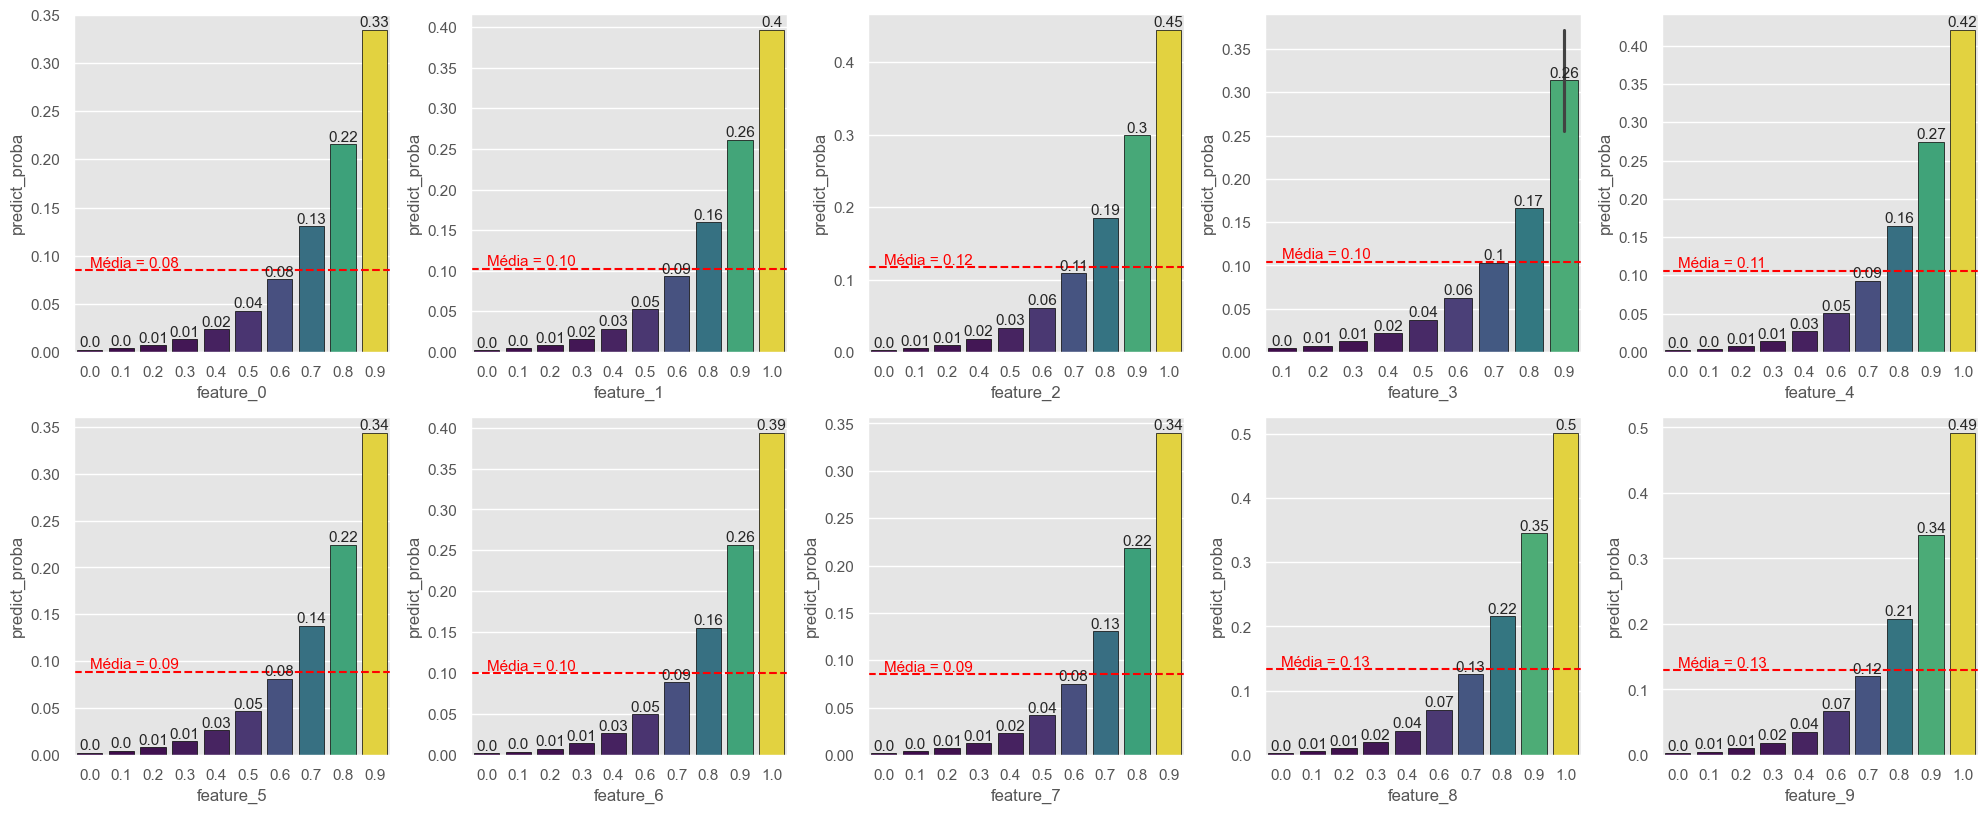

In [134]:
x_data = pd.DataFrame(x_teste, columns=df.columns[:-1])

plt.figure(figsize=(20, 40))
for i, column in enumerate(x_data.columns, 1):  # `enumerate` agora começa em 1
    plt.subplot(10, 5, i)  # Subplots de 9 linhas e 6 colunas (9 * 6 = 54 subplots possíveis)
    resultado = contribuicao_proba_tabela(x_data, column, modelo_xgb_basico, sep=10)
    contribuicao_proba_grafico(resultado, column)
    
plt.tight_layout()
plt.show()

# XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 8, 10], 
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [25, 50, 100],
}

import xgboost as xgb
#modelo_xgb = xgb.XGBClassifier()
#modelo_xgb = GridSearchCV(estimator=modelo_xgb, 
#                                param_grid=grid, 
#                                cv=4, 
#                                scoring='recall', 
#                                verbose=1)

#from sklearn.naive_bayes import GaussianNB
#modelo_xgb = GaussianNB()

#from sklearn.tree import DecisionTreeClassifier
#modelo_xgb = DecisionTreeClassifier(max_depth = 2)

#from sklearn.svm import SVC
#modelo_xgb = SVC(kernel='linear')

from sklearn.neighbors import KNeighborsClassifier
modelo_xgb = KNeighborsClassifier(n_neighbors=5)

# Treinamento do Modelo
modelo_xgb.fit(x_treino, y_treino)

In [ ]:
modelo_xgb#.best_params_

In [ ]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = modelo_xgb.predict(x_teste)

fd_xgb = aval_modelo_corte_tabela(x_teste, y_teste, modelo_xgb, beta=1.5)
display(fd_xgb)
#aval_modelo_corte_grafico(fd_xgb)

# XGBoost SMOTE

In [ ]:
# BALANCEAMENTO DE DADOS - OVERSAMPLING
from imblearn.over_sampling import SMOTE

#criando dados sintéticos
oversample = SMOTE() 
x_balanceado, y_balanceado = oversample.fit_resample(x_treino, y_treino)

# checkando
print(pd.Series(y_balanceado).value_counts())
print(pd.Series(y_balanceado).value_counts(normalize = True))

#######################################################################################

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 8, 10], 
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [25, 50, 100],
}

import xgboost as xgb
#modelo_xgb_balanceado = xgb.XGBClassifier()
#modelo_xgb_balanceado = GridSearchCV(estimator=modelo_xgb_balanceado, 
#                                param_grid=grid, 
#                                cv=4, 
#                                scoring='recall', 
#                                verbose=1)
from sklearn.linear_model import LogisticRegression
modelo_xgb_balanceado = LogisticRegression()
# Treinamento do Modelo
modelo_xgb_balanceado.fit(x_balanceado, y_balanceado)

In [ ]:
modelo_xgb_balanceado#.best_params_

In [ ]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = modelo_xgb_balanceado.predict(x_teste)

fd_xgb_balanceado = aval_modelo_corte_tabela(x_teste, y_teste, modelo_xgb_balanceado, beta=1.5)
display(fd_xgb_balanceado)
#aval_modelo_corte_grafico(fd_xgb_balanceado)

# Avaliando dos tres modelos (threshold)

In [ ]:
aval_modelo_corte_grafico(fd_xgb_basico[['threshold','precisao','sensibilidade','f1','fb_score']])
aval_modelo_corte_grafico(fd_xgb[['threshold','precisao','sensibilidade','f1','fb_score']])
aval_modelo_corte_grafico(fd_xgb_balanceado[['threshold','precisao','sensibilidade','f1','fb_score']])

# Combinando tudo em emsamble

# =============================================

# Analisando as probabilidades geradas pelos modelos

In [ ]:
df_previsoes = adicionar_previsoes(y_teste=y_teste, x_teste=x_teste,
    xgb_basico=modelo_xgb_basico, 
    xgb=modelo_xgb, 
    xgb_balanceado=modelo_xgb_balanceado)
pd.concat([df_previsoes.head(5), df_previsoes.tail(5)])

In [ ]:
colunas = df_previsoes.columns[1:]
fig = px.box(df_previsoes, y=colunas, color="y")
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df_previsoes['y'],
                   colorscale = [[0,'grey'], [1,'red']]),
        dimensions = list([
            dict(range = [0, 100],
                label = 'xgb_basico', values = df_previsoes['xgb_basico']),
            dict(range = [0, 100],
                label = 'xgb', values = df_previsoes['xgb']),
            dict(range = [0, 100],
                label = 'xgb_balanceado', values = df_previsoes['xgb_balanceado']),
            dict(range = [0, 1],
                #constraintrange = [0.5,1],
                label = 'y', values = df_previsoes['y'])
        ])
    )
)

# mesmo grafico porem mais simples
#fig = px.parallel_coordinates(df_previsoes, color="y",
                              #dimensions=['xgb_basico', 'xgb', 'xgb_balanceado', 'y'],
                              #color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=0.5)

fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico pairplot
pairplot = sns.pairplot(df_previsoes, hue="y", height=2)

# Definir a escala de cada eixo de 0 a 100
for ax in pairplot.axes.flatten():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

# Mostrar o gráfico
plt.show()

In [ ]:
fig = px.scatter_3d(df_previsoes, x='xgb_basico', y='xgb', z='xgb_balanceado', color="y")
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
df_previsoes.groupby('y').describe().T.head(16)

In [ ]:
display(summary_num_nonparametric_groups(df_previsoes, 'xgb_basico', 'y'))
display(summary_num_nonparametric_groups(df_previsoes, 'xgb', 'y'))
display(summary_num_nonparametric_groups(df_previsoes, 'xgb_balanceado', 'y'))

# Analisando combinações de thresholds

In [ ]:
grade_thresholds = gridsearch_mult_models_threshold(df_previsoes, beta=1.5) #linspace_thresholds = list(range(5, 100, 5)), 
grade_thresholds

In [ ]:
# Selecionar colunas a partir da quinta
colunas = grade_thresholds.columns[5:-3]

# Criar um gráfico de boxplot para as colunas selecionadas
fig = px.box(grade_thresholds, y=colunas)
fig.show()

In [ ]:
import plotly.express as px

fig = go.Figure(data=
    go.Parcoords(
        dimensions = list([
            dict(range = [0, 1], label = 'precisao', values = grade_thresholds['precisao']),
            dict(range = [0, 1], label = 'sensibilidade', values = grade_thresholds['sensibilidade']),
            dict(range = [0, 1], label = 'fb_score', values = grade_thresholds['fb_score']),
            dict(range = [0, 1], label = 'valor_pre_posi', values = grade_thresholds['valor_pre_posi']),
            dict(range = [0, 1], label = 'taxa_falsos_negativos', values = grade_thresholds['taxa_falsos_negativos']),
            dict(range = [0, 1], label = 'fdr', values = grade_thresholds['fdr']),
            dict(range = [0, 1], label = 'indice_youden', values = grade_thresholds['indice_youden']),
            dict(range = [0, 1], label = 'coef_matthews', values = grade_thresholds['coef_matthews'])
        ])
    )
)

fig.show()

In [ ]:
fig = px.scatter_3d(grade_thresholds, x='precisao', y='sensibilidade', z='f1')
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
fig = px.scatter_3d(grade_thresholds, x=0, y=1, z=2, color='f1')
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
grade_thresholds['index'] = grade_thresholds.index


fig = px.scatter(grade_thresholds, x='precisao', y='sensibilidade', 
                 #color="taxa_falsos_positivos",
                 size='taxa_falsos_positivos',
                 hover_data=['f1','threshold','index'],
                 trendline="lowess")  # Adiciona a linha LOESS
fig.show()

In [ ]:
correlation_matrix = grade_thresholds[colunas].corr().round(2)
fig = px.imshow(correlation_matrix, text_auto=True, title='Matriz de Correlação')
fig.show()

# Analisando modelo Final

In [32]:
grade_thresholds.sort_values('f1', ascending=False).to_excel('comp.xlsx')

In [ ]:
linha = grade_thresholds.sort_values('f1', ascending=False).index[0]
print(grade_thresholds.loc[linha])

corte1 = grade_thresholds[0][linha]
corte2 = grade_thresholds[1][linha]
corte3 = grade_thresholds[2][linha]
print(corte1, corte2, corte3)

In [ ]:
df_previsoes['xgb_basico_b'] = np.where(df_previsoes['xgb_basico'] > corte1, 1, 0)
df_previsoes['xgb_b'] = np.where(df_previsoes['xgb'] > corte2, 1, 0)
df_previsoes['xgb_balanceado_b'] = np.where(df_previsoes['xgb_balanceado'] > corte3, 1, 0)

df_previsoes['decisao_final'] = df_previsoes['xgb_basico_b'] + df_previsoes['xgb_b'] + df_previsoes['xgb_balanceado_b']
df_previsoes['decisao_final'] = np.where(df_previsoes['decisao_final'] >= 2, 1, 0)
df_previsoes

In [ ]:
colunas = list(df_previsoes.columns[4:7])
colunas.append('decisao_final')
colunas.append('y')
colunas

In [ ]:
df_previsoes_filter = df_previsoes[df_previsoes['y'] == 1].reset_index(drop=True)
fig = px.parallel_categories(df_previsoes_filter[colunas], 
                             color='decisao_final', 
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=0.5)
fig.show()

# ==========================================